In [1]:
import os
dataDir='/content/'
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

In [ ]:
# get the annotation files
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip /content/annotations_trainval2017.zip
!gdown 1fGEM1CUhfy5J46IWrtMzXDFARnLMsC7h
from codesV2 import *

In [3]:
dataType='val2017' #train2017, val2017

# initialize COCO api for instance annotations
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.80s)
creating index...
index created!


## OBB for coco images - no Augmentation

img_id=157928


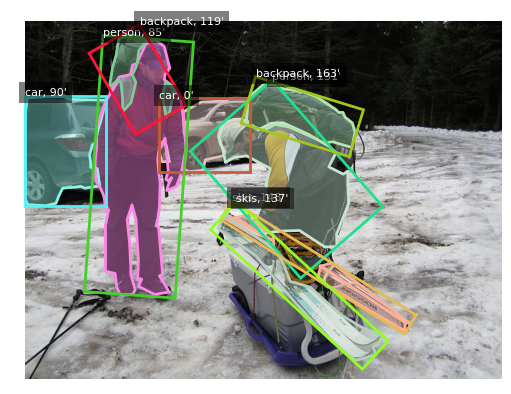

In [7]:
#if img_id is not given, a random image will be selected
random_image = True

if random_image:
  img_id=None
else:
  try:
    img_id=img_id
  except:
    img_id = input('enter image id:')

anns, img_id = get_obb_onthefly(coco, img_id=None, with_segment=True, with_category=True, with_angle=True)

## OBB methods comparison

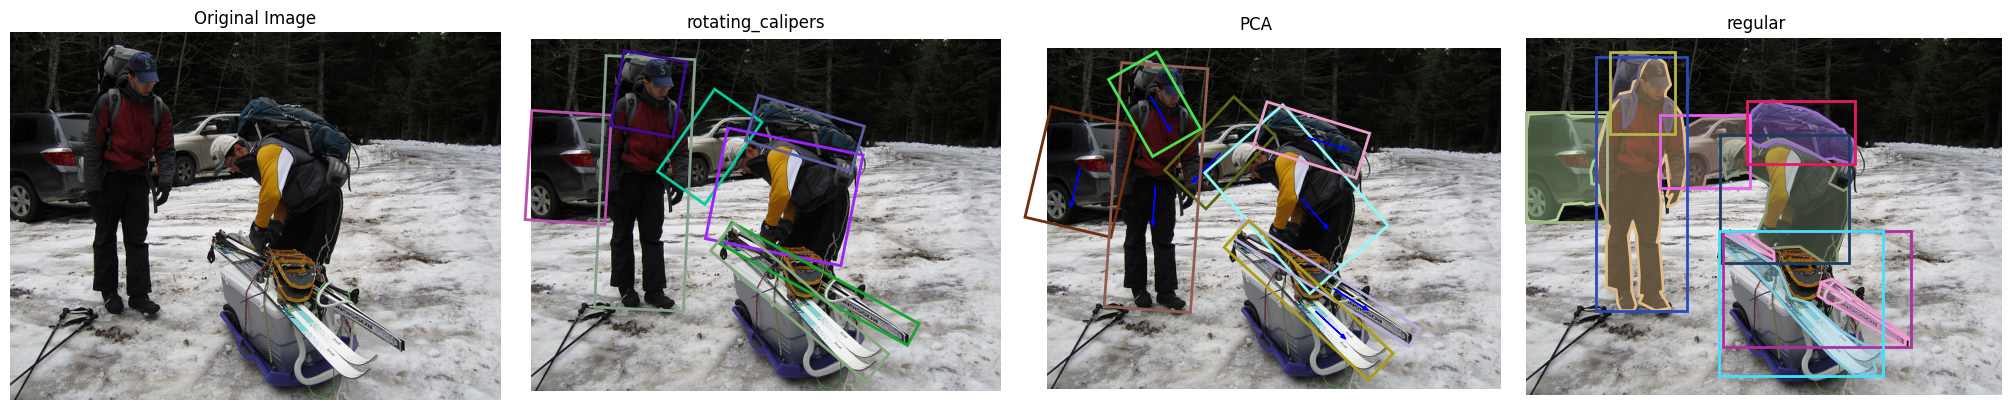

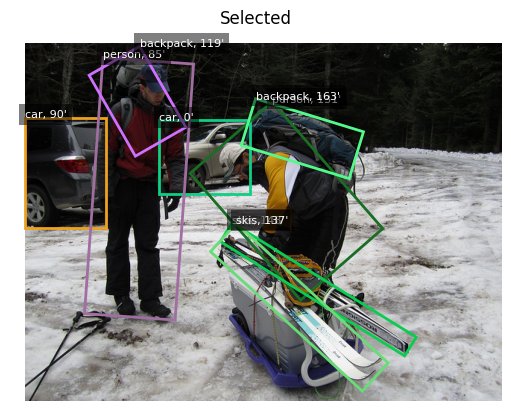

In [8]:
#if img_id is not given, a random image will be selected
random_image = False

if random_image:
  img_id=None
else:
  try:
    img_id=img_id
  except:
    img_id = input('enter image id:')

Ann_dict = Compare_OBB_methods(coco, MethodsLists, img_id=img_id)

## An augmented image with on the fly oriented bounding boxes

img_id_destination=88265
{0: ['giraffe'], 1: ['bird'], 2: ['airplane'], 3: ['traffic light'], 4: ['bird'], 5: ['horse']} 
 [[0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
line shown above an object: <object category, -No. objects behind it, +No. objects over it , visible area%, /, visible area% due to cut only, orientation >


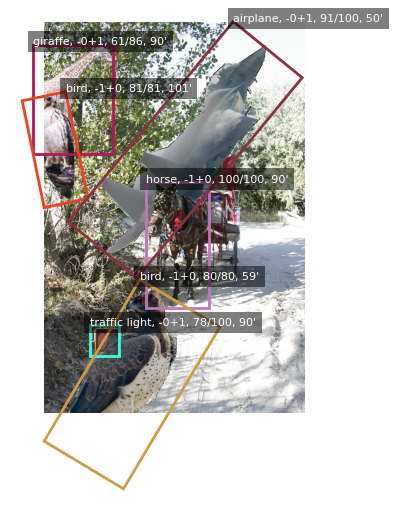

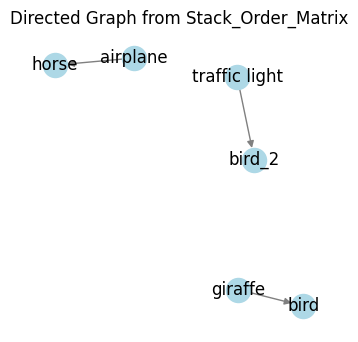

In [17]:
bbox_kind = 'obbox' #'obbox' for oriented, and'bbox' for regular bboxes
N_augmented_obj=5
anns_aug, I_aug, overlay_Matrix, objects_order, adjacency = Augment_anImage(coco, N_augmented_obj=N_augmented_obj, img_id=None,
                                                                img_ids_to_augment_from=None, bbox_kind = bbox_kind,
                                                                with_segment=False, with_category=True, plot_DAG=True)

In [21]:
print_annotations(anns)

[
{
"segmentation": [[0.0,102.76,53.05,99.48,59.62,104.64,89.2,105.11,108.92,105.58,101.41,135.16,98.12,145.49,96.24,154.41,94.37,163.33,90.61,165.68,86.85,179.29,88.26,190.09,88.26,195.73,97.18,197.61,100.47,220.61,80.28,223.9,75.59,221.55,62.44,222.96,59.62,222.96,50.7,223.9,45.54,234.23,41.78,244.09,28.17,247.37,19.24,246.9,3.75,245.97,0.46,238.45,0.46,150.65,0.46,124.36,3.28,103.23]],
"area": 12634.379299999997,
"iscrowd": 0,
"image_id": 157928,
"bbox": [0.0,99.48,108.92,147.89],
"category_id": 3,
"id": 346467,
"obbox": [0.0,99.5,108.9,99.5,108.9,247.4,0.0,247.4],
"orientation": 90,
"center": [167.06,46.22],
"direction": [0.97,-0.23]
},
{
"segmentation": [[267.96,106.8,236.89,108.22,212.1,121.62,213.81,149.55,216.66,158.39,216.37,174.64,215.8,181.19,214.09,190.88,213.52,198.01,220.08,201.72,239.17,199.72,242.02,185.75,266.25,180.34,269.1,174.35,261.98,164.09,259.98,152.12,262.55,142.71,270.24,137.01,278.22,134.45,282.79,134.16,288.77,134.16,294.19,137.3,297.32,136.73,297.32,131.6,2

### show regular bounding boxes and segmentation


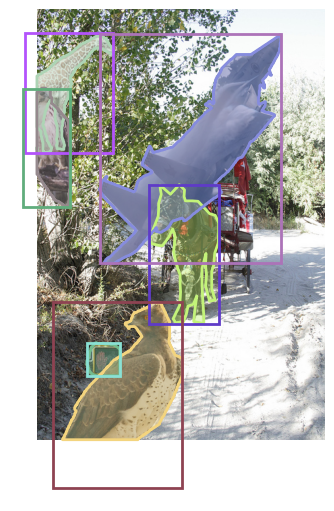

In [19]:
bbox_kind = 'bbox' #'obbox' for oriented, and'bbox' for regular bboxes

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
show_obbox(I_aug, anns_aug, coco,bbox_key=bbox_kind, title='', with_segment=True, with_arrow=False,with_category=False, ax=ax)